In [1]:
import numpy as np # linear algebra
import pandas as pd 

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
L = np.sqrt(784)
L

28.0

In [6]:
def plotNum(ind):
    plt.imshow(np.reshape(np.array(data.iloc[ind,1:]), (28, 28)), cmap="gray")#display image

<IPython.core.display.Javascript object>


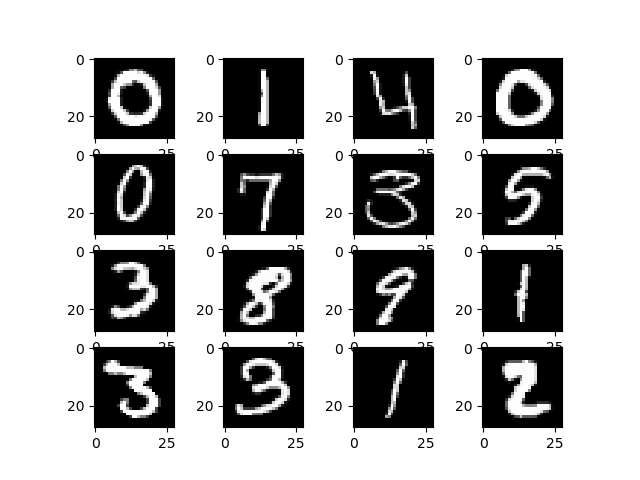

In [7]:
plt.figure()
for ii in range(1,17):
    plt.subplot(4,4,ii)
    plotNum(ii)

In [8]:
X = data.iloc[:, 1:]
y = data['label']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=-1, n_estimators=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
rfc.score(X_test, y_test)

0.9377142857142857

In [14]:
unknown = pd.read_csv("test.csv")


In [15]:
y_out = rfc.predict(unknown)
y_out

array([2, 0, 4, ..., 3, 9, 2], dtype=int64)

In [17]:
Label = pd.Series(y_out,name = 'Label')
ImageId = pd.Series(range(1,28001),name = 'ImageId')
submission = pd.concat([ImageId,Label],axis = 1)
submission.to_csv('submissionRandom.csv',index = False)